## Amylase experiments

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ttest_ind

In [2]:
df = pd.read_csv('amylase_data.csv',index_col=0).sort_values('OD405')
df.head()

,OD405,STD
aa,,
Cys,0.06723,0.001775
starch,0.07507,0.001204
Gly,0.07557,0.002053
Leu,0.07567,0.002290
Phe,0.07600,0.002609


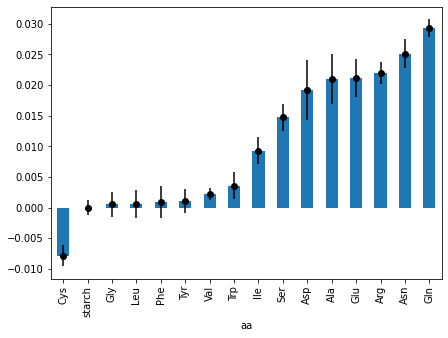

In [3]:
reduced = (df['OD405']-df['OD405']['starch'])
fig, ax = plt.subplots(figsize=(7,5))
reduced.plot.bar()
ax.errorbar(reduced.index, reduced.values, yerr=df['STD'].values, fmt='o', color='k')
fig.savefig('experimental_amylase_data.svg',format='SVG')

In [4]:
df = pd.read_csv('Supplementary File 3.csv',index_col=0)

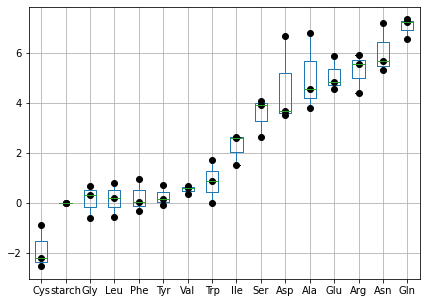

In [5]:
standard = 0.016642
rel = (df - df.loc['starch']) / standard / (5*0.05)
rel = rel.loc[rel.mean(axis=1).sort_values().index].T
fig, ax = plt.subplots(figsize=(7,5))
rel.boxplot()
for i,d in enumerate(rel):
    y = rel[d]
    x = i*np.ones(len(y)) + 1
    plt.plot(x, y, color='k', marker="o", linestyle="None")
fig.savefig('experimental_amylase_data_box.svg',format='SVG')

In [6]:
rel.T

,sample1,sample2,sample3
aa,,,
Cys,-2.547771,-2.211273,-0.889316
starch,0.000000,0.000000,0.000000
Gly,-0.624925,0.672996,0.312462
Leu,-0.552818,0.793174,0.192285
Phe,-0.312462,0.961423,0.024036
Tyr,-0.096142,0.721067,0.144213
Val,0.336498,0.648960,0.600889
Trp,0.865281,0.000000,1.706526
Ile,2.643913,1.490206,2.571806


In [9]:
for a,row in rel.T.iterrows():
    x = row.values
    y = rel['starch'].values
    t = ttest_ind(x,y)
    print(a,t.pvalue,t.statistic)

Cys 0.02047696360256672 -3.7198634537113233
starch nan nan
Gly 0.7715563668718043 0.3106848830005974
Leu 0.7298329291638092 0.3704456603788424
Phe 0.5877647041248042 0.5885938965681898
Tyr 0.3499957899834208 1.0573097607281463
Val 0.005529885194973436 5.443588252359342
Trp 0.15681513277890477 1.7401249700521793
Ile 0.003904774661936705 5.990656625527729
Ser 0.0014342848518267154 7.833137315342109
Asp 0.01071914934426895 4.5125492482741745
Ala 0.004904259603584852 5.6275229584785365
Glu 0.0002243550837767433 12.657237440506087
Arg 0.0003050837934989977 11.700888079163468
Asn 0.00048715932776359136 10.37560099486024
Gln 8.294221361338496e-06 29.106598546504404


In [8]:
t

Ttest_indResult(statistic=29.106598546504404, pvalue=8.294221361338496e-06)

In [42]:
rel[d]

sample1    1.808677
sample2    1.640428
sample3    1.832712
Name: Gln, dtype: float64

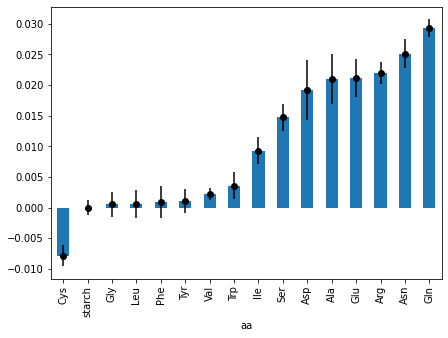

In [43]:
reduced = (df['OD405']-df['OD405']['starch'])
fig, ax = plt.subplots(figsize=(7,5))
reduced.plot.bar()
ax.errorbar(reduced.index, reduced.values, yerr=df['STD'].values, fmt='o', color='k')
fig.savefig('experimental_amylase_data.svg',format='SVG')

In [79]:
flux_based_reactions(me,'cys__L_c',flux_dict=flux_responses_me.iloc[:,0].to_dict(),only_types = ['MetabolicReaction'])

,lb,ub,rxn_flux,met_flux,reaction
CYSTGL_FWD_BSU27250-MONOMER_mod_pydx5p,0,999999,0.00435578,0.00435578,4.27350427350427e-6*mu BSU27250-MONOMER_mod_py...
HEMECS_FWD_CPLX_dummy,0,999999,0,-0,4.27350427350427e-6*mu CPLX_dummy + 2.0 cys__L...
BIOMASS_BS_10_FWD_CPLX_dummy,0,0,0,-0,0.000367 10fthf_c + 4.27350427350427e-6*mu CPL...
PPNCL_FWD_BSU15700-MONOMER,0,999999,0,-0,4ppan_c + 3.22695132810028e-6*mu BSU15700-MONO...
CYSS_2_FWD_BSU00730-MONOMER_mod_2:pydx5p,0,999999,0,0,8.58171771088816e-6*mu BSU00730-MONOMER_mod_2:...
AHSERL4_FWD_BSU00730-MONOMER_mod_2:pydx5p,0,999999,0,0,4.27350427350427e-6*mu BSU00730-MONOMER_mod_2:...
AHSERL4_REV_BSU00730-MONOMER_mod_2:pydx5p,0,999999,0,-0,4.27350427350427e-6*mu BSU00730-MONOMER_mod_2:...
TRPAS1_FWD_BSU27250-MONOMER_mod_pydx5p,0,999999,0,-0,4.34718776686646e-6*mu BSU27250-MONOMER_mod_py...
CYSabc_FWD_CPLX_dummy,0,999999,0,0,4.27350427350427e-6*mu CPLX_dummy + atp_c + cy...
SHSL1_FWD_BSU11870-MONOMER,0,999999,0,-0,4.27350427350427e-6*mu BSU11870-MONOMER + cys_...


In [80]:
flux_based_reactions(me,'cys__L_c',flux_dict=flux_responses_me.iloc[:,-1].to_dict(),only_types = ['MetabolicReaction'])

,lb,ub,rxn_flux,met_flux,reaction
CYSTGL_FWD_BSU27250-MONOMER_mod_pydx5p,0,999999,0.00435575,0.00435575,4.27350427350427e-6*mu BSU27250-MONOMER_mod_py...
HEMECS_FWD_CPLX_dummy,0,999999,0,-0,4.27350427350427e-6*mu CPLX_dummy + 2.0 cys__L...
BIOMASS_BS_10_FWD_CPLX_dummy,0,0,0,-0,0.000367 10fthf_c + 4.27350427350427e-6*mu CPL...
PPNCL_FWD_BSU15700-MONOMER,0,999999,0,-0,4ppan_c + 3.22695132810028e-6*mu BSU15700-MONO...
CYSS_2_FWD_BSU00730-MONOMER_mod_2:pydx5p,0,999999,0,0,8.58171771088816e-6*mu BSU00730-MONOMER_mod_2:...
AHSERL4_FWD_BSU00730-MONOMER_mod_2:pydx5p,0,999999,0,0,4.27350427350427e-6*mu BSU00730-MONOMER_mod_2:...
AHSERL4_REV_BSU00730-MONOMER_mod_2:pydx5p,0,999999,0,-0,4.27350427350427e-6*mu BSU00730-MONOMER_mod_2:...
TRPAS1_FWD_BSU27250-MONOMER_mod_pydx5p,0,999999,0,-0,4.34718776686646e-6*mu BSU27250-MONOMER_mod_py...
CYSabc_FWD_CPLX_dummy,0,999999,0,0,4.27350427350427e-6*mu CPLX_dummy + atp_c + cy...
SHSL1_FWD_BSU11870-MONOMER,0,999999,0,-0,4.27350427350427e-6*mu BSU11870-MONOMER + cys_...


In [ ]:
get_met_production()

In [75]:
flux_responses_me

,4.1857057163280617e-07,4.196358015645641e-07,4.2070103149632206e-07,4.2176626142808e-07,4.2283149135983796e-07,4.238967212915959e-07,4.2496195122335385e-07,4.260271811551118e-07,4.2709241108686975e-07,4.281576410186277e-07,...,5.155064954227794e-07,5.165717253545374e-07,5.176369552862953e-07,5.187021852180532e-07,5.197674151498112e-07,5.208326450815692e-07,5.218978750133271e-07,5.22963104945085e-07,5.24028334876843e-07,5.25093564808601e-07
biomass_dilution,1.731167e-01,1.731167e-01,1.731167e-01,1.731167e-01,1.731167e-01,1.731167e-01,1.731167e-01,1.731167e-01,1.731167e-01,1.731167e-01,...,1.731119e-01,1.731119e-01,1.731119e-01,1.731119e-01,1.731119e-01,1.731119e-01,1.731119e-01,1.731119e-01,1.731119e-01,1.731119e-01
protein_biomass_to_biomass,6.007422e-02,6.007421e-02,6.007421e-02,6.007420e-02,6.007420e-02,6.007419e-02,6.007418e-02,6.007418e-02,6.007417e-02,6.007417e-02,...,6.007210e-02,6.007210e-02,6.007209e-02,6.007198e-02,6.007208e-02,6.007208e-02,6.007207e-02,6.007206e-02,6.007206e-02,6.007205e-02
mRNA_biomass_to_biomass,2.272137e-04,2.272139e-04,2.272140e-04,2.272142e-04,2.272144e-04,2.272145e-04,2.272147e-04,2.272149e-04,2.272151e-04,2.272152e-04,...,2.272210e-04,2.272212e-04,2.272214e-04,2.272228e-04,2.272217e-04,2.272219e-04,2.272220e-04,2.272222e-04,2.272224e-04,2.272225e-04
tRNA_biomass_to_biomass,1.380852e-03,1.380853e-03,1.380854e-03,1.380855e-03,1.380856e-03,1.380857e-03,1.380858e-03,1.380859e-03,1.380860e-03,1.380861e-03,...,1.380897e-03,1.380898e-03,1.380899e-03,1.380908e-03,1.380901e-03,1.380902e-03,1.380903e-03,1.380904e-03,1.380905e-03,1.380906e-03
rRNA_biomass_to_biomass,9.981530e-03,9.981538e-03,9.981545e-03,9.981552e-03,9.981560e-03,9.981567e-03,9.981575e-03,9.981582e-03,9.981590e-03,9.981597e-03,...,9.981853e-03,9.981860e-03,9.981868e-03,9.981920e-03,9.981883e-03,9.981890e-03,9.981897e-03,9.981905e-03,9.981912e-03,9.981920e-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
translocation_BSU39450,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
translocation_BSU39710,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
translocation_BSU40070,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
translocation_BSU40330,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [78]:
get_met_production(me,['cys__L_c'],flux_responses_me,'dummy_demand',only_types = ['MetabolicReaction'])

<generator object get_met_production at 0x7f4723783bf8>

In [121]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['svg.fonttype'] = 'none'

In [71]:
amylase = pd.read_csv('amylase_results.csv',index_col=0)

In [72]:
flux_responses_me = pd.read_csv('force_amylose_production.csv',index_col=0)

In [73]:
dummy_change = flux_responses_me.loc['dummy_demand'].values[-1] - flux_responses_me.loc['dummy_demand'].values[0]
dummy_change

1.0652299317579473e-07

In [112]:
df = amylase.copy()
df = df.sort_values(by='met_comp')
df['change'] = amylase['change'] / dummy_change
df = df.drop(['glu__L_c','gln__L_c','leu__L_c','asp__L_c'])

In [113]:
X = df['met_comp'].values
Y = df['change'].values

In [114]:
X = sm.add_constant(X)
ols = sm.OLS(Y, X)
ols_result = ols.fit()

In [115]:
predictions = ols_result.get_prediction()
df_predictions = predictions.summary_frame(alpha=0.05)

In [117]:
ols_result.summary()

/home/jt/new_cobra/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.460
Method:                 Least Squares   F-statistic:                     13.78
Date:                Mon, 16 May 2022   Prob (F-statistic):            0.00232
Time:                        08:42:34   Log-Likelihood:                -63.571
No. Observations:                  16   AIC:                             131.1
Df Residuals:                      14   BIC:                             132.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.9382      7.296     -0.540      0.598     -19.586      11.710
x1           484.3921    130.486      3.712      0.002     204.527     764.257
==============================================================================
Omnibus:                       12.214   Durbin-Watson:                   2.821
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               10.485
Skew:                           1.152   Prob(JB):                      0.00529
Kurtosis:                       6.228   Cond. No.                         38.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Figure size 504x360 with 0 Axes>

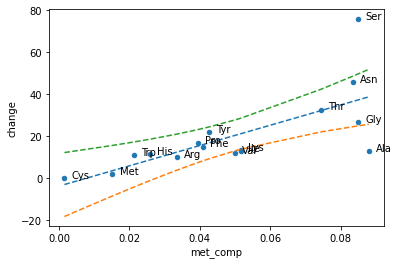

In [122]:
fig = plt.figure(figsize=(7,5))
df.plot.scatter(x='met_comp',y='change')
plt.plot(df['met_comp'],df_predictions['mean'],'--')
plt.plot(df['met_comp'],df_predictions['mean_ci_lower'],'--')
plt.plot(df['met_comp'],df_predictions['mean_ci_upper'],'--')
for met_id,row in df.iterrows():
    met_id = met_id[:3].capitalize()
    plt.text(row['met_comp']+0.002,row['change'],met_id[:3])
    plt.xlabel('met_comp')
    plt.ylabel('change')
plt.savefig('confidence_interval.svg',format='SVG')

In [60]:
predict_from_OLS(X,1)

array([764.27462433, 764.43454307, 764.50561806, 764.55892431,
       764.64776805, 764.71884305, 764.7366118 , 764.75438055,
       764.84322429, 764.86099304, 764.86099304, 765.12752427,
       765.23413676, 765.25190551, 765.25190551, 765.28744301])

In [26]:
lin_Y = lin.predict(X)


array([[-3.20312989],
       [ 3.41224086],
       [ 6.35240564],
       [ 8.55752923],
       [12.2327352 ],
       [15.17289998],
       [15.90794118],
       [16.64298237],
       [20.31818835],
       [21.05322954],
       [21.05322954],
       [32.07884747],
       [36.48909464],
       [37.22413583],
       [37.22413583],
       [38.69421822]])

In [29]:
lin.conf_int

AttributeError: 'LinearRegression' object has no attribute 'conf_int'

<Figure size 504x360 with 0 Axes>

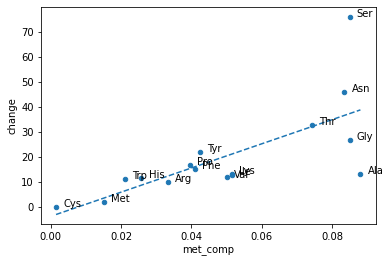

In [27]:
fig = plt.figure(figsize=(7,5))
df.plot.scatter(x='met_comp',y='change')
plt.plot(X,lin_Y,'--')
for met_id,row in df.iterrows():
    met_id = met_id[:3].capitalize()
    plt.text(row['met_comp']+0.002,row['change'],met_id[:3])
    plt.xlabel('met_comp')
    plt.ylabel('change')